In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from mpmath_integration import quad_phi

In [3]:
instance = 'instances/instances_general_algo.csv'

In [4]:
df = pd.read_csv(instance)

In [5]:
df.head()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp
0,0.118216,0.209108,0.030134,3.722877,1.801323,0.060465,0.060465,0.060465
1,4.504637,3.667039,-3.434034,-0.147107,2.335966,1.000000,1.000000,1.000000
2,-3.558404,0.450252,-0.319093,2.752972,2.218896,0.103112,0.103112,0.103112
3,4.486494,0.545200,0.353340,-0.041184,1.572132,0.913257,0.913257,0.913257
4,-1.881685,3.186210,-1.030812,-4.584931,0.460011,0.999999,0.999999,0.999999


In [6]:
df.loc[df['scipy'] == 'NAN', 'scipy'] = np.NaN
df['scipy'] = df['scipy'].astype(float)

df.loc[df['gnp'] == 'NAN', 'gnp'] = np.NaN
df['gnp'] = df['gnp'].astype(float)

In [7]:
df['relerr_gnp'] = np.absolute(df['gnp'] / df['mpmath'] - 1)
df['abs_gnp'] = np.absolute(df['gnp'] - df['mpmath'])

In [8]:
df['relerr_scipy'] = np.absolute(df['scipy'] / df['mpmath'] - 1)
df['abs_scipy'] = np.absolute(df['scipy'] - df['mpmath'])

In [9]:
df.describe()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-0.025352,2.533611,-0.034799,-0.029142,2.492489,5.007353e-01,5.007353e-01,5.007353e-01,1.674261e-14,5.692895e-15,1.888488e-05,7.569277e-13
std,2.889619,1.451462,1.681183,2.910092,1.420696,4.353408e-01,4.353408e-01,4.353408e-01,5.405951e-14,1.178523e-14,1.197020e-03,2.318885e-11
min,-4.999040,0.001562,-4.953604,-4.999842,0.002673,1.479100e-40,1.479100e-40,1.479100e-40,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-2.499877,1.261606,-0.994493,-2.548120,1.290809,9.587406e-03,9.587406e-03,9.587406e-03,6.661338e-16,2.081668e-17,3.330669e-16,9.658974e-18
50%,-0.036527,2.560397,-0.018630,-0.035475,2.499332,4.927365e-01,4.927365e-01,4.927365e-01,3.774758e-15,2.220446e-16,1.332268e-15,4.440892e-16
75%,2.508378,3.787534,0.902873,2.516573,3.718896,9.935991e-01,9.935991e-01,9.935991e-01,1.398881e-14,5.662137e-15,9.720003e-14,1.776357e-15
max,4.997911,4.999279,4.799063,4.997239,4.999505,1.000000e+00,1.000000e+00,1.000000e+00,9.581225e-13,6.994405e-14,8.454635e-02,1.433365e-09


In [10]:
mask_inf = df['relerr_gnp'] == np.inf
mask_nan = (df['relerr_gnp'].isna() & (df['mpmath'] != df['gnp']) & (df['mpmath'] != 0))

mask_err = df['relerr_gnp'] > 5e-13

In [11]:
mask_inf.sum(), mask_nan.sum()

(0, 0)

In [12]:
df[mask_inf]

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy


In [13]:
mask_err.sum(), (df['relerr_gnp'] > 1e-13).sum()

(20, 117)

In [14]:
df[mask_err].sort_values('relerr_gnp', ascending=False).head(30)

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
198,-3.723793,2.196780,1.400284,-1.378789,2.486542,0.000102,0.000102,0.000102,9.581225e-13,9.791701e-17,3.082479e-10,3.150000e-14
735,-3.894280,4.426176,-0.703534,-2.663263,0.061134,0.000110,0.000110,0.000110,8.106849e-13,8.932471e-17,6.443035e-11,7.099993e-15
2711,1.046785,1.303074,0.865223,4.806618,4.298452,0.000115,0.000115,0.000115,7.516210e-13,8.628894e-17,0.000000e+00,0.000000e+00
3925,-4.360548,0.562510,0.377708,0.429970,0.395753,0.000133,0.000133,0.000133,7.460699e-13,9.958397e-17,3.176363e-10,4.240000e-14
3868,-0.083778,3.058265,2.078297,1.451794,1.232661,0.000101,0.000101,0.000101,7.289724e-13,7.387483e-17,0.000000e+00,0.000000e+00
3002,-2.006611,4.390879,1.716302,-0.611549,0.901468,0.000140,0.000140,0.000140,6.954437e-13,9.752399e-17,7.132073e-13,1.000177e-16
336,2.459484,4.065568,2.254212,3.884698,3.715484,0.000104,0.000104,0.000104,6.858958e-13,7.100169e-17,2.105800e-09,2.180000e-13
3809,1.344691,4.707714,3.351939,2.053797,2.748758,0.000132,0.000132,0.000132,6.694645e-13,8.866063e-17,0.000000e+00,0.000000e+00
2098,-4.960354,0.466929,0.440299,1.734420,3.358783,0.000126,0.000126,0.000126,6.177281e-13,7.806256e-17,1.582667e-11,1.999974e-15
4093,-2.256106,2.920164,0.141184,2.409828,4.511011,0.000120,0.000120,0.000120,6.001866e-13,7.222142e-17,0.000000e+00,0.000000e+00


In [15]:
df[~mask_err].sort_values('relerr_gnp', ascending=False).head(20)

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
4475,-2.930626,4.972851,4.346729,-4.240472,4.427644,0.000178,0.000178,0.000178,4.947154e-13,8.828116e-17,0.000000e+00,0.000000e+00
3312,2.055391,4.571771,0.399435,4.003795,1.095913,0.000142,0.000142,0.000142,4.920508e-13,6.971420e-17,7.056578e-13,9.999055e-17
4217,-4.919087,0.989841,0.579080,0.256024,4.456039,0.000141,0.000141,0.000141,4.811707e-13,6.803369e-17,0.000000e+00,0.000000e+00
1179,-1.663637,1.360121,-0.481758,3.441760,0.243652,0.000138,0.000138,0.000138,4.796163e-13,6.635317e-17,2.631018e-10,3.640000e-14
2973,-2.288073,3.070540,-2.037001,4.938048,1.088120,0.000178,0.000178,0.000178,4.649614e-13,8.275173e-17,7.587042e-11,1.350000e-14
109,-2.567845,3.134892,0.317015,1.247904,4.023912,0.000191,0.000191,0.000191,4.531930e-13,8.670907e-17,0.000000e+00,0.000000e+00
2652,-4.267085,1.607396,1.209397,-1.883260,1.434098,0.000160,0.000160,0.000160,4.489742e-13,7.182839e-17,6.374466e-09,1.020000e-12
2898,-1.437948,2.333816,0.448206,0.564096,0.301704,0.000144,0.000144,0.000144,4.487521e-13,6.464555e-17,8.415424e-10,1.212000e-13
4293,-2.091208,1.543914,-0.016527,4.228752,3.217397,0.000156,0.000156,0.000156,4.465317e-13,6.979551e-17,1.279643e-12,2.000082e-16
3833,0.580344,2.158483,-0.107652,4.633615,1.421684,0.000134,0.000134,0.000134,4.427569e-13,5.944138e-17,7.449485e-12,9.999868e-16


In [16]:
df[~mask_err].describe()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03
mean,-0.018598,2.532202,-0.038383,-0.035533,2.492271,5.027457e-01,5.027457e-01,5.027457e-01,1.429481e-14,5.715416e-15,1.896072e-05,7.598630e-13
std,2.889029,1.451435,1.682198,2.911064,1.420322,4.350543e-01,4.350543e-01,4.350543e-01,3.709425e-14,1.180350e-14,1.199421e-03,2.323533e-11
min,-4.999040,0.001562,-4.953604,-4.999842,0.002673,1.479100e-40,1.479100e-40,1.479100e-40,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-2.494537,1.260362,-1.005494,-2.554671,1.290809,1.063039e-02,1.063039e-02,1.063039e-02,6.661338e-16,2.081668e-17,3.330669e-16,1.140354e-17
50%,-0.024473,2.558475,-0.020124,-0.055833,2.499332,4.970227e-01,4.970227e-01,4.970227e-01,3.663736e-15,2.220446e-16,1.332268e-15,4.440892e-16
75%,2.517564,3.786085,0.898857,2.514771,3.718896,9.938406e-01,9.938406e-01,9.938406e-01,1.376677e-14,5.773160e-15,9.531265e-14,1.776357e-15
max,4.997911,4.999279,4.799063,4.997239,4.999505,1.000000e+00,1.000000e+00,1.000000e+00,4.947154e-13,6.994405e-14,8.454635e-02,1.433365e-09


In [17]:
df[mask_err].describe()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-1.707111,2.884494,0.857736,1.562384,2.546689,0.000140,0.000140,0.000140,6.262435e-13,8.503465e-17,2.046836e-10,2.604000e-14
std,2.587245,1.451686,1.112919,2.180467,1.549295,0.000030,0.000030,0.000030,1.253514e-13,1.232182e-17,4.815277e-10,5.327394e-14
min,-4.960354,0.466929,-0.926753,-2.663263,0.061134,0.000101,0.000101,0.000101,5.082601e-13,6.163689e-17,0.000000e+00,0.000000e+00
25%,-3.766415,1.948824,0.135814,0.169590,1.372514,0.000117,0.000117,0.000117,5.226930e-13,7.410861e-17,0.000000e+00,0.000000e+00
50%,-2.145660,2.940305,0.680248,1.691337,2.611560,0.000133,0.000133,0.000133,5.790923e-13,8.747479e-17,3.566036e-13,5.000883e-17
75%,0.198863,4.399703,1.747546,3.612016,3.861226,0.000164,0.000164,0.000164,7.038259e-13,9.762224e-17,2.447437e-10,3.320001e-14
max,2.808246,4.873390,3.351939,4.806618,4.743680,0.000193,0.000193,0.000193,9.581225e-13,9.961107e-17,2.105800e-09,2.180000e-13


In [18]:
df_err = df[mask_err].sort_values('relerr_gnp', ascending=False).copy()

In [19]:
df_err = df_err.reset_index(drop=True)

In [20]:
df_err.head()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
0,-3.723793,2.196780,1.400284,-1.378789,2.486542,0.000102,0.000102,0.000102,9.581225e-13,9.791701e-17,3.082479e-10,3.150000e-14
1,-3.894280,4.426176,-0.703534,-2.663263,0.061134,0.000110,0.000110,0.000110,8.106849e-13,8.932471e-17,6.443035e-11,7.099993e-15
2,1.046785,1.303074,0.865223,4.806618,4.298452,0.000115,0.000115,0.000115,7.516210e-13,8.628894e-17,0.000000e+00,0.000000e+00
3,-4.360548,0.562510,0.377708,0.429970,0.395753,0.000133,0.000133,0.000133,7.460699e-13,9.958397e-17,3.176363e-10,4.240000e-14
4,-0.083778,3.058265,2.078297,1.451794,1.232661,0.000101,0.000101,0.000101,7.289724e-13,7.387483e-17,0.000000e+00,0.000000e+00


In [21]:
idx = 0
df_err.iloc[idx].mpmath, df_err.iloc[idx].gnp

(0.0001021904644571, 0.00010219046445719792)

In [22]:
x, alpha, beta, mu, delta = df_err.iloc[idx][['x', 'alpha', 'beta', 'mu', 'delta']]
x, alpha, beta, mu, delta

(-3.723793135039304,
 2.196780202545397,
 1.4002843362379838,
 -1.378789114137724,
 2.4865418652853744)

In [52]:
mp_result = quad_phi(x, alpha, beta, mu, delta, digits=300)
mp_result

mpf('0.00010219046445719785')

#### 1. Decision tree (test for more complex cases)

In [21]:
from sklearn import tree

In [22]:
df['target'] = (~mask_err).astype(int)

In [23]:
df.head()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,target
0,0.118216,0.209108,0.030134,3.722877,1.801323,0.060465,0.060465,0.060465,2.220446e-16,1.387779e-17,0.000000e+00,0.000000e+00,1
1,4.504637,3.667039,-3.434034,-0.147107,2.335966,1.000000,1.000000,1.000000,2.542411e-14,2.542411e-14,8.548717e-15,8.548717e-15,1
2,-3.558404,0.450252,-0.319093,2.752972,2.218896,0.103112,0.103112,0.103112,2.331468e-15,2.359224e-16,8.881784e-16,9.714451e-17,1
3,4.486494,0.545200,0.353340,-0.041184,1.572132,0.913257,0.913257,0.913257,0.000000e+00,0.000000e+00,2.220446e-16,2.220446e-16,1
4,-1.881685,3.186210,-1.030812,-4.584931,0.460011,0.999999,0.999999,0.999999,1.443290e-14,1.443290e-14,0.000000e+00,0.000000e+00,1


In [24]:
df['xmu'] = np.absolute(df['x'] - df['mu'])

In [25]:
X = df[['alpha', 'beta', 'delta', 'xmu']]
y = df['target']

In [26]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

In [27]:
clf.score(X, y)

0.9962

[Text(0.5, 0.8333333333333334, 'beta <= 0.119\ngini = 0.008\nsamples = 5000\nvalue = [20, 4980]'),
 Text(0.25, 0.5, 'delta <= 0.062\ngini = 0.003\nsamples = 2838\nvalue = [4, 2834]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.002\nsamples = 2804\nvalue = [3, 2801]'),
 Text(0.75, 0.5, 'beta <= 0.12\ngini = 0.015\nsamples = 2162\nvalue = [16, 2146]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.014\nsamples = 2161\nvalue = [15, 2146]')]

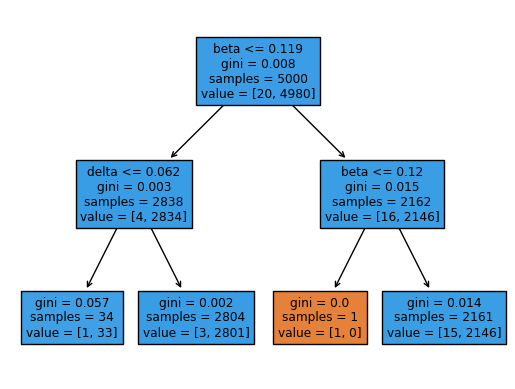

In [28]:
tree.plot_tree(clf, feature_names=X.columns, filled=True)